In [52]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



def readSpe(path,background=None):
    f=open(path,"r")
    data=f.readlines()
    values=data[12:2060]
    values=[int(row) for row in values]
    duration=int(data[9].split(" ")[0])

    countsPerMin=np.array(values)/duration*60
    if background is not None:
        countsPerMin-=np.array(background["countsPerMin"])

    df=pd.DataFrame({"bin":np.arange(0,len(values),1),
        "counts":values,
        "countsPerMin":countsPerMin,
        })
    
    return df


background=readSpe("background.Spe",None)


runs=[]
for file in sorted(glob.glob("13N/JOB*.Spe")):
    f=open(file,"r")
    d=f.readlines()
    values=d[12:2060]
    values=np.array([int(row) for row in values],dtype=np.float64)
    countsPerMin=values*2

    if background is not None:
        countsPerMin-=np.array(background["countsPerMin"])

    runs.append(pd.DataFrame({
        "countsPerMin":countsPerMin,
        "energies":np.array(range(0,len(values)))*2.082576766420587
    }))

/var/folders/rl/cpjcq0556r36l75xt982r2kh0000gn/T/ipykernel_20024/2825269767.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=mpl.colors.Normalize(vmin=0,vmax=len(runs)*0.5)),label="Minutes")


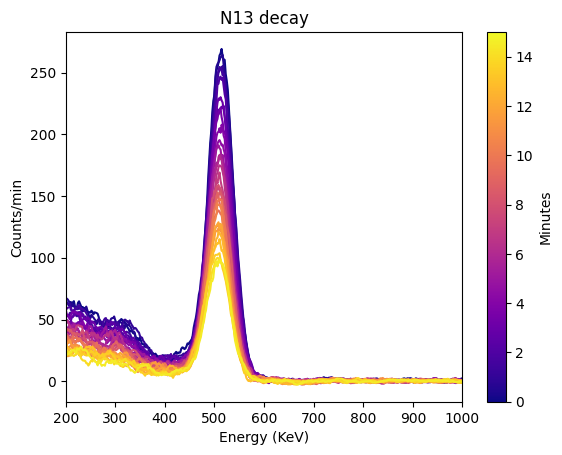

In [54]:
for i,run in enumerate(runs):
    color=plt.cm.plasma(i/len(runs))
    smoothness=10
    smoothed=np.convolve(run["countsPerMin"],np.ones(smoothness),"same")/smoothness
    plt.plot(run["energies"],smoothed,color=color)

plt.xlim(200,1000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Counts/min")
plt.title("N13 decay")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=mpl.colors.Normalize(vmin=0,vmax=len(runs)*0.5)),label="Minutes")